In [1]:
# 統計的仮説検定の考え方

# 「統計的仮説検定」はデータを用いて、数学的背理法と類似した方法により、仮説を検証する方法である
# たとえば、ある母集団の平均がある値と異なることを示したい場合は、以下のように考える
# (1)「母平均はある値と異なる」という命題Aを証明したい
# (2)命題Aを否定し「母平均はある値と等しい」と仮定する
# (3)(2)の仮定をもとにデータをとり、標本平均を求める。
# この標本平均が(2)の仮定のもとでは極めて稀にしか得られないほどずれているということを観察する
# (4)命題Aの否定はおかしいと判断する
# (5)命題Aは正しいと判断する
# ※確率的事象に基づいた判断であるため、当然ながら誤りが生じることがある点に注意

In [4]:
# 検定法の導出

# 母平均μがμ0でないことを検証する統計的仮説検定を考える
# このとき「母平均μがμ0ではない」という検証した仮説を「対立仮説」H1
# それを否定した「母平均μがμ0である」という仮説を「帰無仮説」H0とよび以下のように記述する
# 帰無仮説H0:μ=μ0 vs 対立仮説H1:μ≠μ0
# その後「統計検定量」を求め、「有意水準」をもとに、H0の「棄却」(=有意である)
# または、H0の「受容」(=有意でない)を判断する
# 帰無仮説が棄却される領域は「棄却域」で、受容される両機は「受容域」と呼ばれる
# これらの臨界点は「棄却限界値」あるいは「臨海地」とよばれる

0.002044379229814486


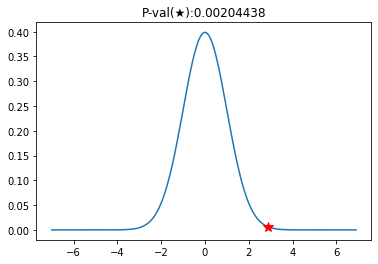

In [44]:
# P-値

# P-値とは、帰無仮説H0のもとで、現在観察されたデータが同じか、
# より稀にしか起こらないようなデータが観察される確率である

import math

import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from scipy.stats import norm

myu = 0

sample_size = 50
norm_sample = norm.rvs(loc=1, scale=2, size=sample_size)
sample_mean = norm_sample.mean()
sample_var = stat.variance(norm_sample)

z_val = (sample_mean-myu)/math.sqrt(sample_var/sample_size)

z_cdf = norm.cdf(x=z_val, loc=0, scale=1)
p_val = 1 - z_cdf
print(p_val)
fig, ax = plt.subplots(1)
X = np.arange(-7,7,0.1)
Y = norm.pdf(X, 0, 1)
ax.plot(X, Y)
ax.plot(z_val, norm.pdf(z_val), '*', color='r', markersize=10)
plt.title(f"P-val(★):{p_val:.8f}")
plt.show()

In [45]:
# 検定の過誤

# 帰無仮説H0が真に正しいとしても、有意と判定されることがある。
# この誤りを「第一種の過誤」とよぶ。有意水準αにより制御される
# 一方で対立仮説H1が真に正しいとしても、有意と判定されないこともある。
# この誤りを「第二種の過誤」とよび、その確率はβであらわす
# 対立仮説を正しく有意と判定する確率は1-βであり、この確率は「検出力」とよばれる

|  | H0が真 | H0が偽 |
| :---: | :---: | :---: |
| H0を棄却しない | 1-α | β |
| H0を棄却する | α | 1-β(検出力) |

In [56]:
# サンプルサイズの設計

# βの値はサンプルサイズが大きくなるに応じて減少するため、検出力も高くなる
# 対立仮説における統計検定量の期待値は、①H0における棄却限界値と②H1におけるβに対応する正規分位点を足したものになる
# そのため、サンプルサイズnを求めるための等式は以下になる
# ①+②=E[統計検定量]=(μ1-μ0)/√σ**2/n となる
# 上記をnについて解くと
# n = (①+②)**2/((μ1-μ0)/σ)**2

myu0 = 0
std0 = 1

myu1 = 2
std1 = 2
sample_size = 50
norm_sample = norm.rvs(loc=myu1, scale=std1, size=sample_size)
sample_mean = norm_sample.mean()
sample_var = stat.variance(norm_sample)

beta_val = 0.2
h0_critical_val = norm.ppf(q=0.975, loc=myu0, scale=std0)
h1_normal_quantile = norm.ppf(q=beta_val, loc=myu0, scale=std0)

n_result = pow(abs(h0_critical_val)+abs(h1_normal_quantile), 2)\
    /pow((myu1-myu0)/math.sqrt(sample_var), 2)
print(f"検出力{1-beta_val}に必要なサンプルサイズ：{n_result:.3f}")

検出力0.8に必要なサンプルサイズ：9.183


In [57]:
# 抜取検査

# 「抜取検査」とは、日本産業企画(JIS)において
# 「検査ロットから、あらかじめ定められた抜取検査方式に従って、
# サンプルを抜き取って試験し、その結果をロットの判定基準と比較して、
# そのロットの合格・不合格を判定する検査」と定義されている
# 本来は合格である検査ロットが不合格と判定される確率FPは「生産者危険」、
# 本来は不合格品である検査ロットが合格と判定される確率FNは「消費者危険」とよばれる
# なお、不良個数は二項分布(B(n, p(不良率)))に従う